- Deep Learning School (https://www.youtube.com/@DeepLearningSchool)
- Deep Learning на пальцах (https://dlcourse.ai/)
- Андрей Карпатый

In [1]:
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np
import math

In [2]:
def imshow(path, size=(10,10)):
    plt.figure(figsize=(size[0],size[1]))
    plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Deep Learning

## Architectures

### AlexNet, 2012

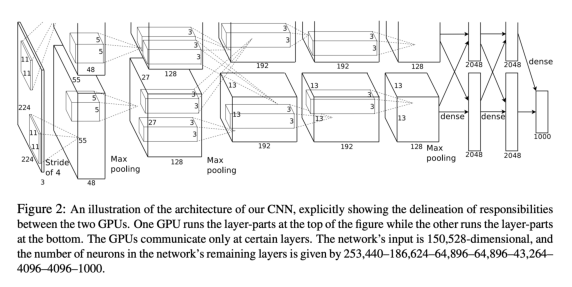

In [19]:
imshow("./imgs/AlexNet.png")

- The First CNN to win Image Net
- Первые кто использовать все вместе: ReLU, dropout
- По структуре похожа на LeNet-5, 1998

### R-CNN (Region-CNN), 2013

1. Без использования нейронных сетей мы будем выделять регионы, которые могут являться хорошими кандидатами на то что там есть объект: Он берет пиксели картинки и соединяет в регионы пиксели, которые близко друг к другу по каким-то параметрам (яркость, цвет и тд), дальше постепенно иерархически он начинает сдвигать друг с другом эти регионы образуя из маленьких более крупные
2. Берем полученные регионы и масштабируем их под вход в cnn (растягиваем/сжимаем)
3. Проганяем через cnn (transer learning + image net)
4. Выход сети: класс, 4 числа для bounding box (x,y,w,h)

Проблемы: Очень долго работает - тратит ~ 1 минуту на 1 картинку. Эта проблема из-за того, что у нас получается очень много регионов для одной картинки (~2 тысячи) и каждый этот регион алгоритм отправляет в cnn. При этом эти регионы еще и очень сильно пересекаются между собой

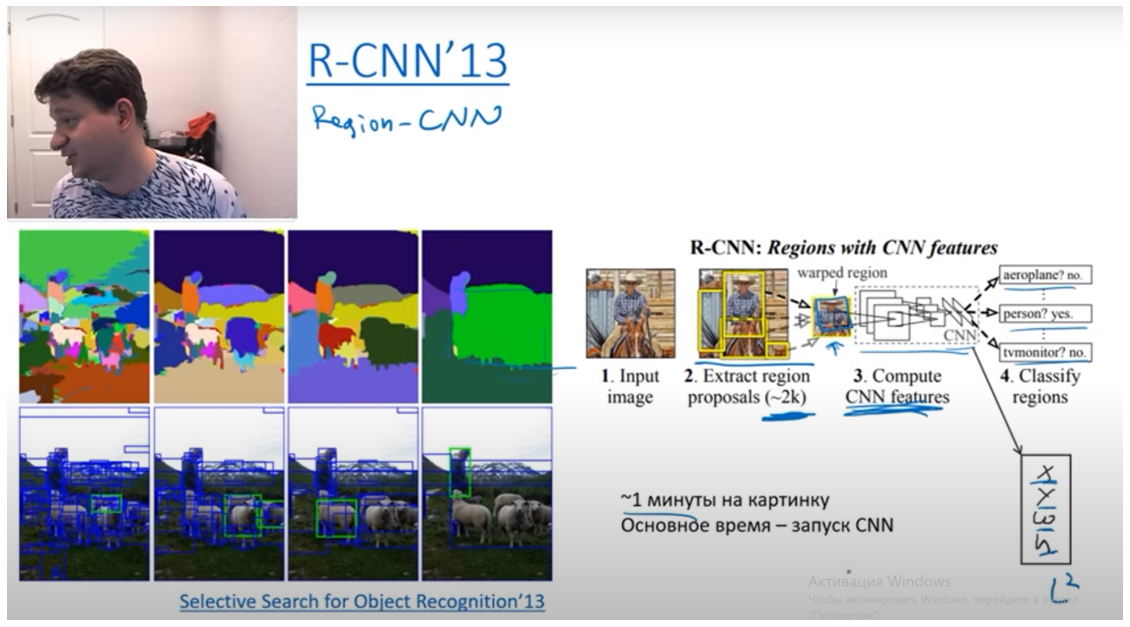

In [113]:
imshow("./imgs/rcnn.png", (20,20))

### Fast R-CNN (Fast Region-CNN), 2015

Для того чтобы ускорить R-CNN было использовано свойство конвалюции. Такое что если мы возьмем картинку например размером 224 Х 224 прогоним ее через full convolution network, а потом возьмем эту же картинку, расширим ее (например добавим какой-нибудь паддинг и она станет 228 Х 228) и прогоним через туже саму сеть, то на выходе два этих подрегиона будут эквивалентны

А это означает, что для R-CNN мы можем сделать один раз свертку, а потом использовать ее

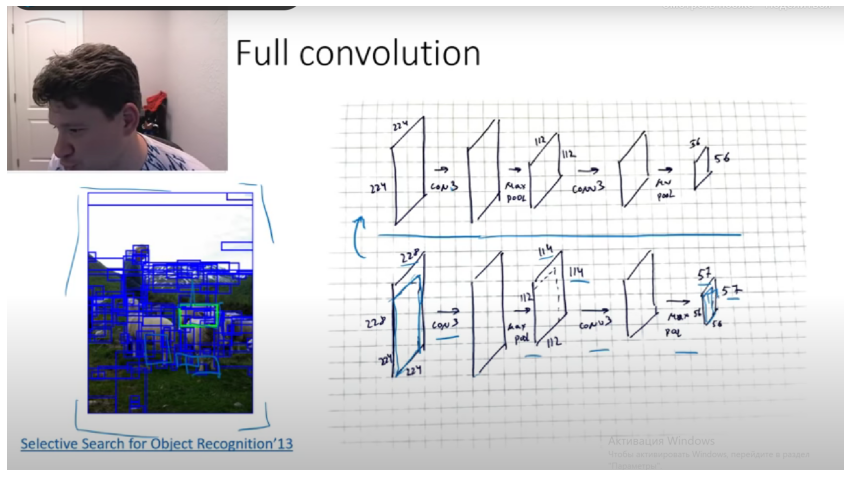

In [117]:
imshow("./imgs/fully_convolution.png", (15,15))

1. Берем всю картинку прогоняем 1 раз конвалюционную часть сети
2. Для каждого региона мы находим соответствующую часть в фича мапе, которая получилась после сетки
3. Изменяем до размера, который принимает FC слой 
4. И FC предсказывает класс и размер баундин бокса

Тем самым мы больше не тратим время на большое кол-во сверток, а делаем ее всего один раз

~ время на операцию 3 секунды и теперь самое большее кол-во времени тратится на поиск регионов

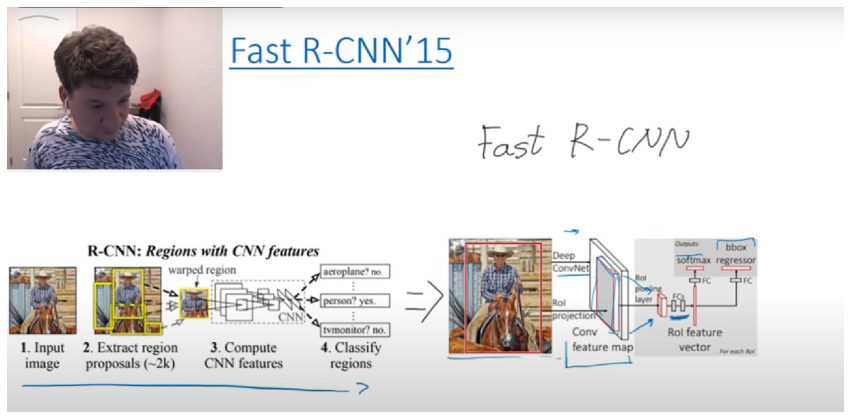

In [118]:
imshow("./imgs/fast_rcnn.png", (15,15))

### Faster R-CNN, 15

Суть такая, что регионы (пропоузалы) тоже генерировать нейросетью 

1. Берем картинку, прогоняем ее через cnn, получаем фича мэп
2. Дальше мы проходимся слайдинг виндоу по фича мэпу и предсказываем есть в текущем регионе объект или нет (это сеть, которая получает контекст вокруг пикселя)
3. Заходим в FC
4. Говорим какие у нас есть боксы и какие у них координаты. (Какие у нас есть боксы значит, что ее учат определять К возможных размеров и пропорций боксов )
5. Дальше берем эти координаты и предсказываем класс и бб как и было раньше

Предсказание ~0.2 сек на картинку

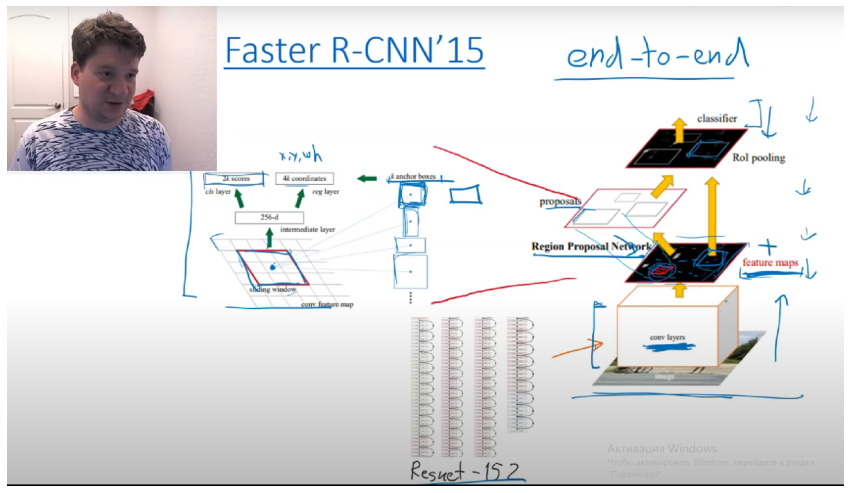

In [122]:
imshow("./imgs/faster_rcnn.png", (15,15))

### Yolo

Общая идея: 

1. Делим картинку на гриды
2. cnn в каждом гриде предсказывает какой основной класс (какой класс больше всего перекрывает эту клетку)
3. Для того класса, котороый больше всего генерируем баундин бокс 
4. Усредняем баундин бокс для каждого класса

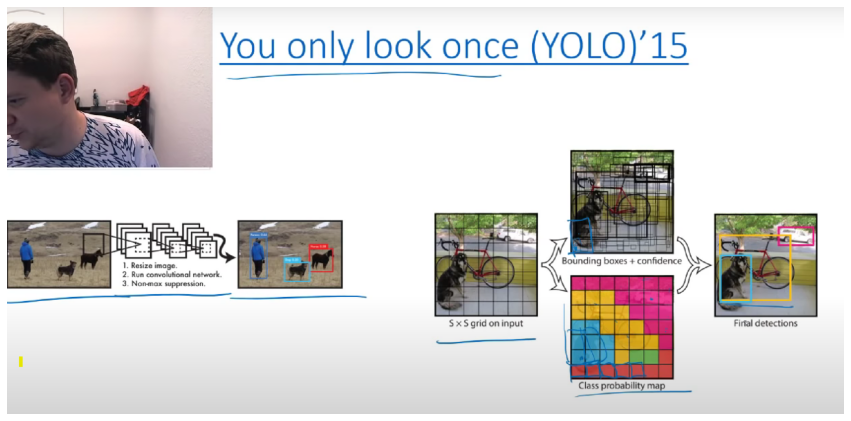

In [125]:
imshow("./imgs/yolo.png", (15,15))

### Unet

Суть такая, что мы добавили skip connections в архитектуру "песочных" часов, где мы энкодим и декодим входное изображение

Основная проблема - как не потерять пространственное разрешение из-за пулов, конволушенов и тд., а если мы сделаем дополнительную связь между блоками и одинаковым разрешением

Таким образом у нас есть два пути по которому распространяется сигнал:
1. Путь, который постепенно уменьшает разрешение, чтобы находить более выскокуровненые фичи
2. Потом на обратном пути блоку разрешается заглянуть в то какая была фича мэп в таком же разрешении вначале и восстановить общую структуру из высокоуровневых фич, а микроструктуру из того какие были активации во время первой части прохода 

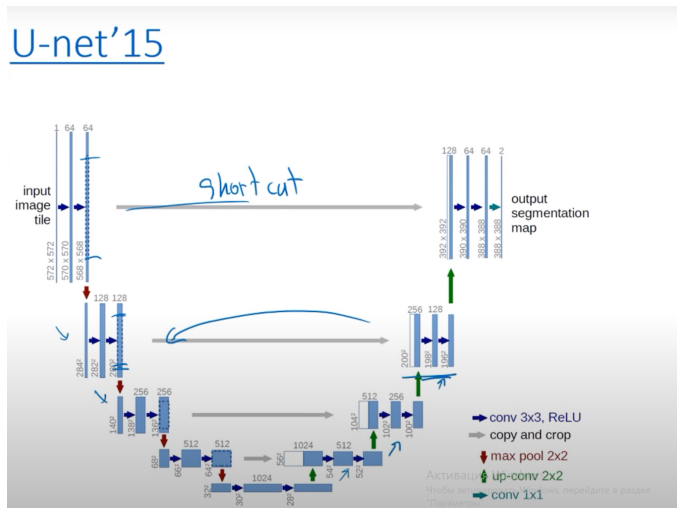

In [131]:
imshow("./imgs/unet.png", (12,12))

## Функции Активации

Функции, которые позволяют сделать нелинейное преобразование над промежуточными признаковыми представлениями данных внутри нейронной сети. На вход у нейронной сети подаются признаки, после прохода через слой признаковое представление меняется и для того чтобы эти представления нелинейно изменялись, то есть не были просто линейной комбинацией изначальных признаков, используют функцию активации

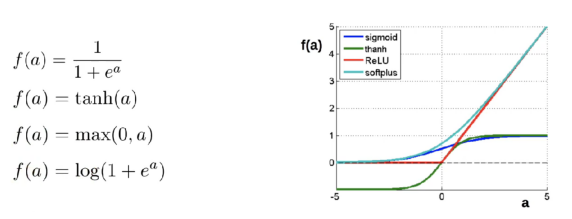

In [20]:
imshow("./imgs/actuation_functions.png")

### Сигмоида

Плюсы:
+ Дифференцируется
+ Легко интерпретируется как вероятность (1 - нейрон активен, 0 - неактивен)

Минусы:
- Обладает значительными хвостами, где производная будет 0, соответственно будет происходить затухание градиента
- Нецентрированный выход
- Нужно тратить время на подсчет экспоненты

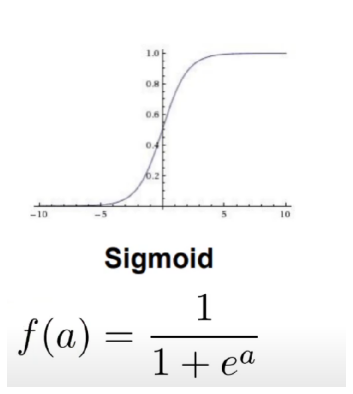

In [21]:
imshow("./imgs/sigmoid.png", (7,7))

### Гиперболический тангенс

Плюсы: 
- Центрирован в нуле

Минусы:
- Градиенты все также затухают
- Нужно тратить время на подсчет экспоненты

Чаще всего используется в рекурентрых нейронках, так как там функция активации должна иметь конечную область значений

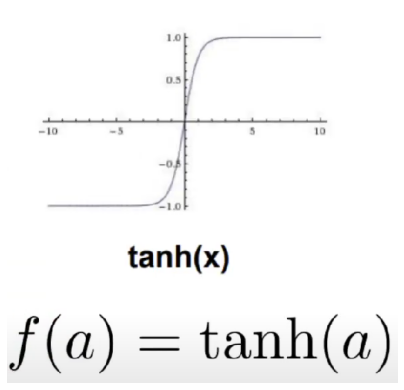

In [12]:
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/tanh.png"), cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

### ReLU

Плюсы:
+ Производная в правой части равна единице и градиент не затухает
+ Быстрая функция - ничего считать не нужно

Минусы: 
- В левой части есть затухание градиента
- аутпут не центрированный (среднее не 0)

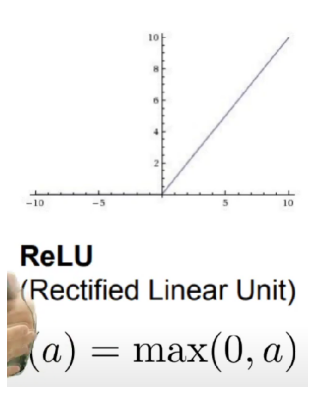

In [14]:
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/relu.png"), cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

### LeakyReLU

Плюсы:
+ аутпут более центрированый 
+ градиеты слева не затухают, у них есть маленький, но градиент

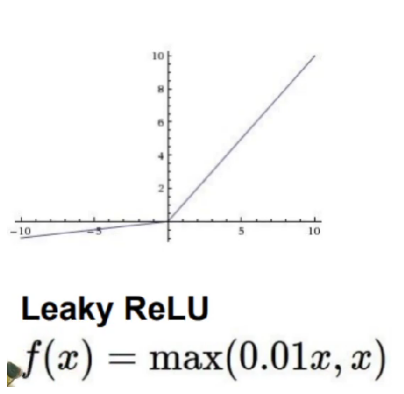

In [16]:
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/LeakyReLU.png"), cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

### Parametric ReLU

Тоже самое, только параметр альфа настраиваемый и сетка сама принимает решение какую альфу поставить

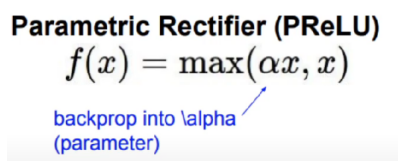

In [18]:
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/PReLU.png"), cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

### ELU

Плюсы:
- Все плюсы релу
- Функция более гладкая

Минусы:
- Нужно считать экспоненту

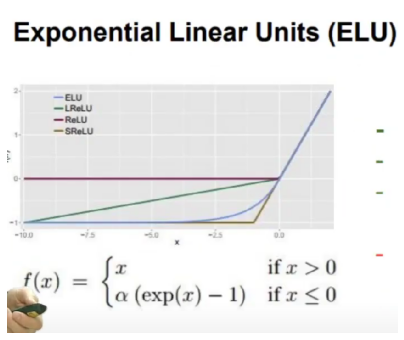

In [20]:
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/ELu.png"), cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

## Metrics

### LogLoss (binary cross entropy)

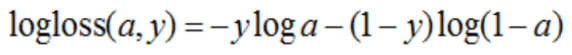

In [22]:
imshow("./imgs/logloss.png")

Если y = 1: $logloss(a,y) = -log(a)$

Если y = 0: $logloss(a,y) = -log(1-a)$

### Categorical Cross-Entropy Loss Function

Let y be the true class label vector (one-hot encoded) and p be the predicted class probabilities vector. Then the categorical cross-entropy loss function can be defined as:

L(y,p) = - Σ y_i * log(p_i)

where Σ denotes summation over all classes, y_i is the true class label for class i (1 if the sample belongs to class i, 0 otherwise), and p_i is the predicted probability of class i.

## Dropout

Медод предотвращения переобучения нейронных сетей - регуляризация

При тренировке с вероятностью P нейроны остаются и никак не взаимодействуют в сети. При тесте все нейроны включаются в работу, но мы добавляем вероятность включения нейрона

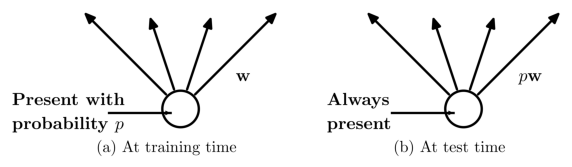

In [23]:
imshow("./imgs/dropout.png")

## Batch Normalization

Метод, который позволяет повысить скорость сходимости и стабилизировать сеть. Суть данного метода заключается в том, что некоторым слоям нейронной сети на вход подаются данные, предварительно обработанные и имеющие нулевое математическое ожидание и единичную дисперсию.

Во время обучения и тестирования важно понимать, как пакетная нормализация работает под капотом. Во время обучения нормализация партии вычисляет среднее значение и стандартное отклонение, соответствующие мини-партии.

Однако во время тестирования (время вывода) у нас может не быть партии для вычисления среднего значения партии и дисперсии. Чтобы преодолеть это ограничение, модель поддерживает скользящее среднее значение и дисперсию во время обучения, называемое скользящим средним и скользящей дисперсией. Эти значения накапливаются по партиям во время обучения и используются как среднее значение и дисперсия во время вывода.

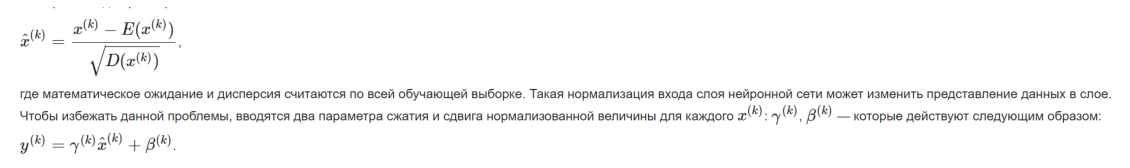

In [24]:
imshow("./imgs/batchnorm.png", (20,20))

## Layer Norm

## Skip connections

## PyTorch

Отличие toch от tensorflow:
TensorFlow использует строение статического графа вычисления в отличие от динамического как в PyTorch. Это означает, что каждый раз, когда мы создаем сеть на tensorflow мы должны прописать все необходимые модули, при этом они должны быть в жестком фиксированном порядке и перед началом обучения архитектура нейронной сети фиксируется (комплилируется).

Из-за этого в тенсорфлоу нельзя получить результаты каких-то промежуточных стадий

В торче мы можем легко дебажить архитектуру сети

In [24]:
import torch

In [25]:
torch.FloatTensor([1,2])

tensor([1., 2.])

In [30]:
test = torch.FloatTensor(10)
print(test)
print(test.shape)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
torch.Size([10])


In [32]:
test = torch.FloatTensor(2,3)
print(test)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 9.2755e-39]])


In [33]:
# np.reshape() == torch.view()

test.view(3,2) # --> возващают копию

tensor([[0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 9.2755e-39]])

In [40]:
test = torch.FloatTensor(5)
print(test, test.dtype)
test.type_as(torch.IntTensor()), test.to(torch.int)

tensor([6.3058e-44, 6.7262e-44, 7.1466e-44, 6.3058e-44, 7.0065e-44]) torch.float32


(tensor([0, 0, 0, 0, 0], dtype=torch.int32),
 tensor([0, 0, 0, 0, 0], dtype=torch.int32))

## Трансформеры

# Machine Learning

## Models

- Linear regression
- Logistic regression
- Decision trees/forest
- Clustering algorithms
- SVM

### Decision trees/forest

https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya

Используется как для регрессии так и для классификации

Решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил (которые называются предикатами). Этот процесс в некотором смысле согласуется с естественным для человека процессом принятия решений.

Дерево осуществляет кусочно-постоянную аппроксимацию целевой зависимости.

**Построение оптимального решающего дерева**
- Построение предикантов с помощью жадного алгоритма (те в каждом предиканте искать локально оптимальное решение и строить дерево последовательно)

**Критерии ветвления**
- Регрессия:
    - MSE: $(y-gt)^2$
    - MAE: $|y-gt|$
    
Q - всего объектов, сколько дошли до текущего листа
L, R - сколько объектов попало влево/вправо после разделения 
Pl, Pr - доля объектов одного из классов после разделения (Пример: Q=20, class_0=9, class_1=11, после разделения L=13 (8 нулевого класса, 5 первого), R=7 (1 нулевого класса, 6 первого), Pl = 8/13, Pr = 1/7 (неважно какой класс будет сверху, конечная функуия зеркальна))

(L/Q) * H(Pl) + (R/Q) * H(Pr) ----> min 
    
- Классификация:
    - Энтропия: $H(q) = -qlog(q) - (1-q)log(1-q)$
    - Индекс Джинни: $H(q) = 4q(1-q)$

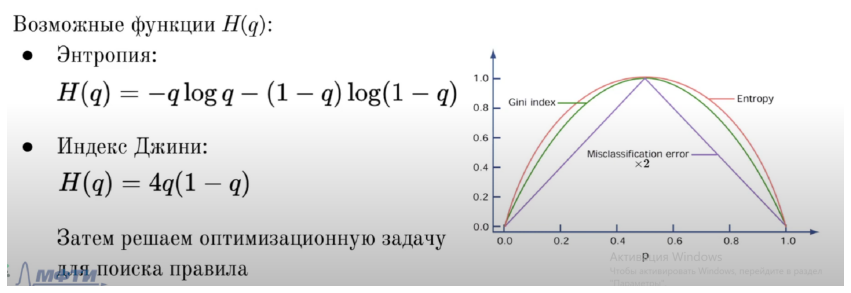

In [25]:
imshow("./imgs/H_functions.png", (15,15))

**Бэггинг, стеккинг, бустинг**

### SVM (метод опорных векторов)

- https://habr.com/ru/company/ods/blog/484148/
- https://www.youtube.com/watch?v=jA9CpUSaSN4&ab_channel=%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%B5%D0%BD%D0%B0%D1%83%D0%BA%D0%B8

Применяется для задач регрессии и классификации

Главная цель SVM как классификатора — найти уравнение разделяющей гиперплоскости
$w_1x_1+w_2x_2+…+w_nx_n+w_0=0$ в пространстве $R^n$, которая бы разделила два класса неким оптимальным образом.

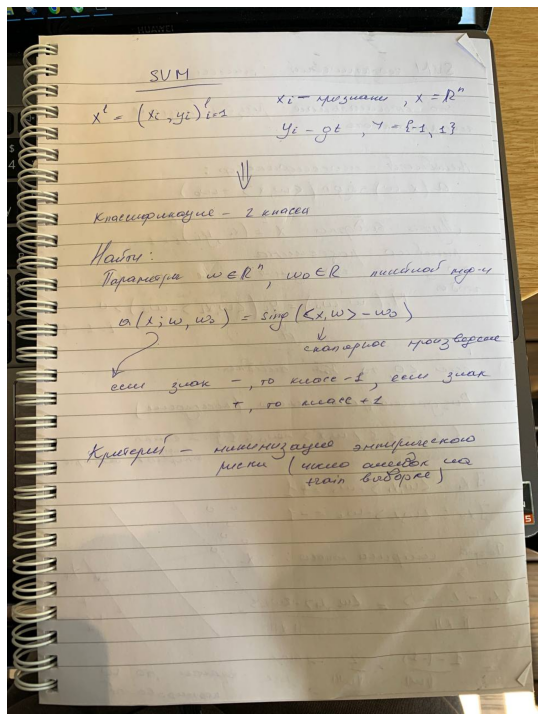

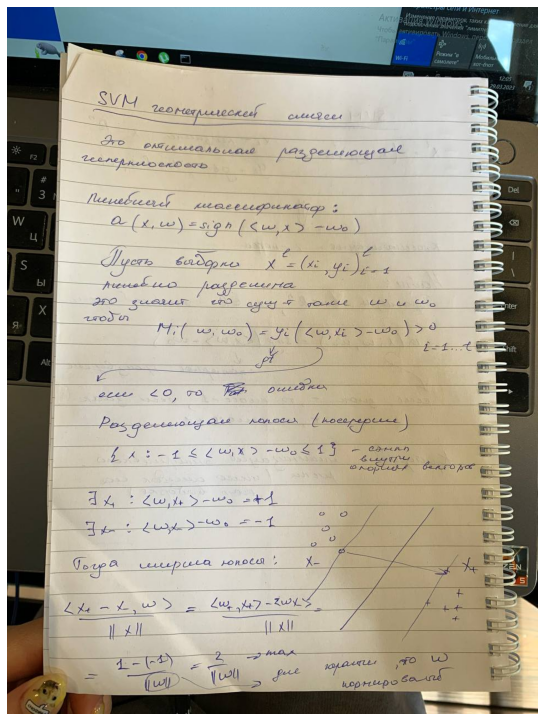

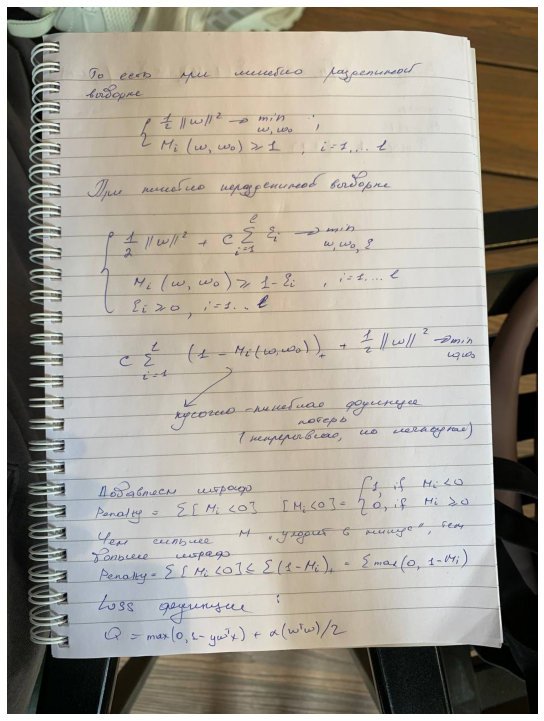

In [27]:
imshow("./imgs/svm_0.jpg", (13,13))
imshow("./imgs/svm_1.jpg", (13,13))
imshow("./imgs/svm_2.jpg", (13,13))

### Clustering algorithms

- K-means
Нужно выполнить несколько шагов: 
1. Выбрать количество кластеров $k$, которое нам кажется оптимальным для наших данных.
2. Высыпать случайным образом в пространство наших данных $k$ точек (центроидов).
3. Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе.
4. Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду.
5. Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся" (обычно это значит, что их смещение относительно предыдущего положения не превышает какого-то заранее заданного небольшого значения).

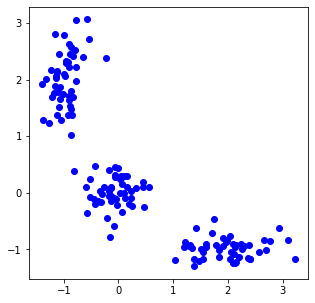

In [20]:
# Начнём с того, что насыпем на плоскость три кластера точек
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo');

In [21]:
# В scipy есть замечательная функция, которая считает расстояния
# между парами точек из двух массивов, подающихся ей на вход
from scipy.spatial.distance import cdist

# Прибьём рандомность и насыпем три случайные центроиды для начала
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Считаем расстояния от наблюдений до центроид
    distances = cdist(X, centroids)
    # Смотрим, до какой центроиде каждой точке ближе всего
    labels = distances.argmin(axis=1)

    # Положим в каждую новую центроиду геометрический центр её точек
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

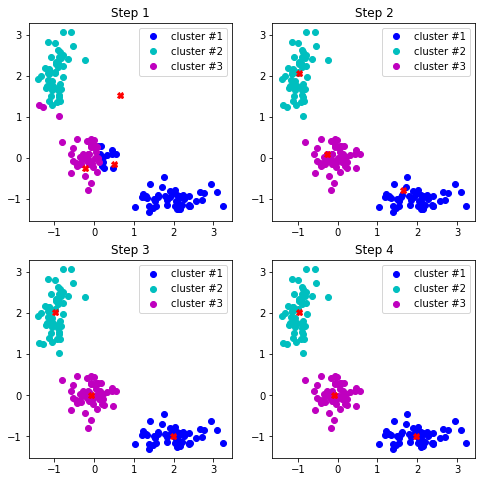

In [22]:
# А теперь нарисуем всю эту красоту
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

**Как выбрать правильное кол-во кластеров**

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.

C:\Users\lena\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lena\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lena\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lena\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, '$J(C_k)$')

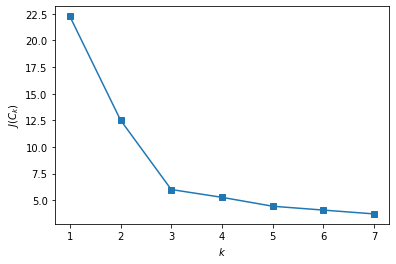

In [48]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

- EM (expectation-maximization) algorithm

https://habr.com/ru/post/501850/

Алгоритм похож на k-means, только работает с теоремой баеса.

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/#:~:text=DBSCAN%20is%20a%20density%2Dbased,points%20into%20a%20single%20cluster.

Число кластеров определяется автоматически

Он группирует «плотно сгруппированные» точки данных в один кластер. Самая интересная особенность кластеризации DBSCAN заключается в том, что она устойчива к выбросам. DBSCAN требует только два параметра:  **epsilon**  и  **minPoints**. **Epsilon** — это радиус круга (В более высоких измерениях круг становится гиперсферой), который должен быть создан вокруг каждой точки данных для проверки плотности, а  **minPoints** — это минимальное количество точек данных, необходимое внутри этого круга, чтобы эта точка данных была классифицирована как основная точка.

Для определения местоположения точек данных в пространстве DBSCAN использует **евклидово расстояние** , хотя можно использовать и другие методы

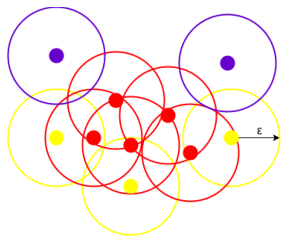

In [53]:
imshow("./imgs/DBSCAN.png", (5,5))

In [59]:
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

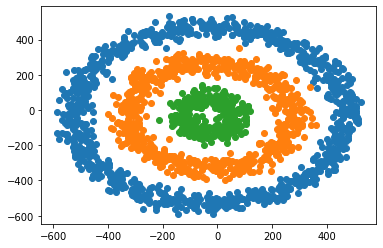

In [79]:
df_1 = np.array(PointsInCircum(500,1000))
df_2 = np.array(PointsInCircum(300,700))
df_3 = np.array(PointsInCircum(100,300))

df = np.concatenate((df_1, df_2, df_3))

plt.scatter(df_1[:,0], df_1[:,1])
plt.scatter(df_2[:,0], df_2[:,1])
plt.scatter(df_3[:,0], df_3[:,1])
plt.show()

# Training methods

## SGD (stochastic gradient descent)

https://youtu.be/kWTC1NvL894

Градиент - это многомерная производная, которая говорит, для некой функции потерь, в каком направлении надо двигаться в пространстве весов (w, b), чтобы эффективнее (локально) всего уменьшить loss.
Самое эффективное - это взять весь наш датасет, сделать forward и backward и сделать шаг, но мы так делать не можем так как просто не хватит железа. 

Поэтому существует важная оптимизация от которой зависит скорость схождения - на каждом шаге градиентного спуска мы выбираем минибатч примеров (128 например), сделаем forward, backward и сделаем шаг на основе нашего минибатча.
Пройти весь датасет с минибатчами - это 1 эпоха

$w -= labbda*gradient$

## Momentum (импульс)

Основная идея как в физике - у нас есть шарик и если у нас большой уклон, то мы катимся c большой скоростью вниз

$Vel = momentum*Vel - lambda*gradient$

$w += vel$

- momentum - трение, которое постепенно снижает предыдущую скорость. Обычно лежит в районе 0.9-0.99

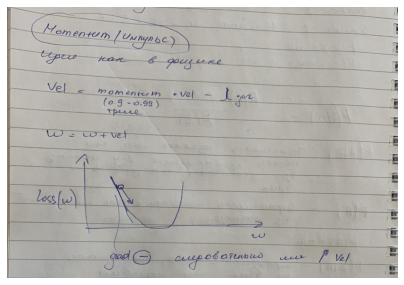

In [89]:
imshow("./imgs/momentum.jpg", (7,7))

## Adagrad

Метод, который хорошо работает с седловыми точками. Его идея такая - делать лернинг рейт не константой для всех измерений, а адаптивно для разных измерений весов подбирать свой лернинг рейт. Если по какому-то направлению градиет говорит, что там неинтересно, что там очень маленькое изменение, то мы его искусственно повысим, а в тех направлениях, где градиент большой, то мы его наоборот понизим.

$accumulated += gradient^2$ - в местах, где градиент большой, этот квадрат сделает его еще больше

$adaptive_lr = lr/sqrt(accumulated)$ - в местах, где градиент большой мы поделим его на большое число, а в местах, где градиент маленький, мы уменьшим его на маленькое число, тем самым уравновесим систему

$w -= adaptive_lr*gradient$

## RMSProp

Тоже самое что и **Adagrad**, только там в первую формулу еще добавляется коэфицент и мы не бесконечно накапливаем градиент

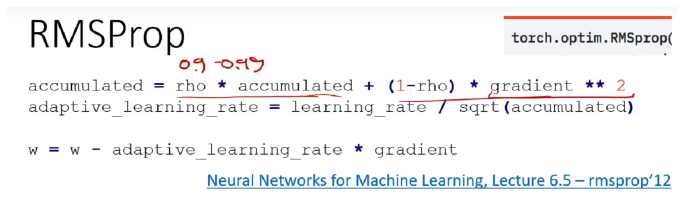

In [95]:
imshow("./imgs/RMSProp.png", (12,12))

## Adam

Комбинирует RMSProp и Momentum

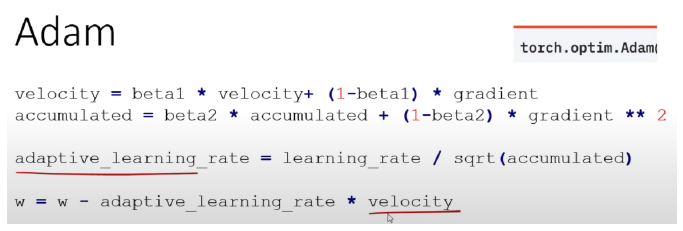

In [98]:
imshow("./imgs/Adam.png", (12,12))

# Вопросы

Q1. Что вы подразумеваете под перекрестной проверкой?

Ответ: Перекрестная проверка используется для того чтобы подобрать лучшие гиперпараметры (не базируясь на результат теста) ну и вообще оценить как наша сеть тренируется. Алгоритм такой - мы берем наш train dataset и разбиваем его на train и validation датасет. При этом мы можем так делать несколько раз и каждый раз брать новый validation датасет рандомно или те части, которые еще не были в валидации

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q2. Как выбрать метрики?

Ответ: Метрики нужны для того чтобы оценить модель. Чтобы подобрать метрику нужно сначала понять какая у нас задача (например: классификация или регрессия). Для классификации можно выбрать accuracy, presision, recall, f1 и тд; для регрессии MSE, MAE, RMSE и тд.

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q3. Что такое ложные срабатывания и ложные отрицания

Ответ: Ложные срабатывания - когда gt=False, pred=True; ложные отрицания - когда gt=True, pred=False

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q5. Что такое случайный лес?

Ответ: Случайный (бэггинг) лес - это алгоритм построеннный на принципе деревьев решений. Главная суть - это то что у нас есть ансамбль из нескольки одинаковых деревьев решений, далее из набора тренировочных данных рандомым образом семплируем "батчи" и каждое дерево тренируется на своем "батче"-датасете, далее при предикшене мы прогоняем инпут через ансамбль и ответ усредняем. Данный алгоритм используется как для регрессии так и для классификации

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q7. Объясните PCA (метод главных компонент) и его использование

https://habr.com/ru/post/304214/

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q8. Каковы недостатки наивного Байеса? Как его можно улучшить?

Ответ: Наивный баес - это классификатор, который делает предположение, что все данные в наборе данных не коррелируют между собой. Расичитвается данный алгоритм по теореме Баеса. Недостатки: в реальных данных не бывает такого чтобы все данные не коррелировали между собой, также одним из недостатков наивного байесовского алгоритма является то, что если класс и значение параметра не встречаются вместе, то оценка вероятности, высчитываемой с использованием частот, будет равна нулю. В итоге после перемножения всех вероятностей мы получим ноль.

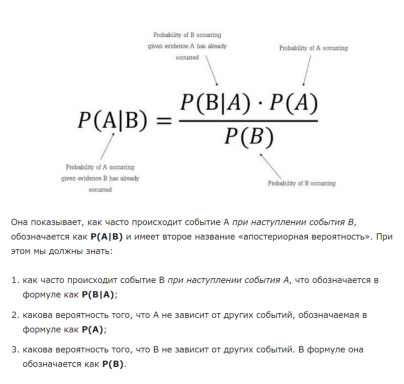

In [59]:
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/bayes.png"), cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show() 

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q17. Какими способами можно уменьшить размерность набора данных?

Ответ: 
- Метод главных компонент

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q18. Принципы ООП
- Абстракция: использование классов для определения абстрактного представления системы
- Инкапсуляция: сокрытие внутренних данных компонента и деталей его реализации от других компонентов приложения и предоставление набора методов для взаимодействия с ним
- Наследование: позволяет создавать иерархические структуры объектов
- Полиморфизм: позволяет вызовом переопределённого метода через переменную класса-родителя получить поведение, которое будет соответствовать реальному классу-потомку, на который ссылается эта переменная.
-------------------------------------------------------------------------------------------------------------------------------------------------------

Q19. Which models can you use to solve a regression problem?
- Linear Regression: establishes a linear relationship between target and predictor (s). It predicts a numeric value and has a shape of a straight line.
- Polynomial Regression: Polynomial Regression has a regression equation with the power of independent variable more than 1. It is a curve that fits into the data points.
$у = а0  + а1*х  + а2*х^2  + … + аn*х^n$
- Ridge Regression: Линейная регрессия с L2 регуляризацией
- Lasso Regression: Линейная регрессия с L1 регуляризацией
-------------------------------------------------------------------------------------------------------------------------------------------------------

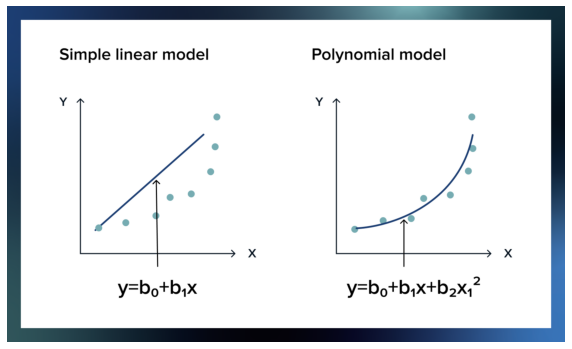

In [105]:
imshow("./imgs/machine-learning-polynomial-regression.png")

Q20. Можно ли на вход линейной модели подать категориальные признаки?

Да, категориальные признаки могут быть поданы на вход линейной модели. Однако, для того чтобы линейная модель могла работать с категориальными признаками, эти признаки должны быть закодированы числовыми значениями.

Существует несколько способов кодирования категориальных признаков:

- Кодирование One-Hot: каждый категориальный признак заменяется на набор бинарных переменных, которые соответствуют каждой уникальной категории признака. Например, если у нас есть признак "цвет", который может быть "красным", "зеленым" или "синим", то мы можем закодировать его следующим образом: красный = [1, 0, 0], зеленый = [0, 1, 0], синий = [0, 0, 1].

- Кодирование целочисленными значениями: каждому уникальному значению категориального признака присваивается уникальный целочисленный код. Например, если у нас есть признак "цвет", который может быть "красным", "зеленым" или "синим", то мы можем закодировать его следующим образом: красный = 1, зеленый = 2, синий = 3.

- Кодирование порядковыми значениями: это используется, когда категориальный признак имеет определенный порядок. Например, если у нас есть признак "размер", который может быть "маленьким", "средним" или "большим", то мы можем закодировать его следующим образом: маленький = 1, средний = 2, большой = 3.

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q21. Гиперпараметры рандом форест

- кол-во деревьев
- глубина деревьев
- минимальное число объектов в конечных листах
- критерий витвления

# CV

Q1. Процесс получения картинки (от выхода с сенсора до RGB)

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q2. Виды шумов (природа) и как бороться

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q3. lable smoothing

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q4. Для чего нужен MaxPool и как он работет при forward/backward

forward: Мы берем ядро размером (nXn) и проходимся им по картинке, в следующий слой идут только максимальные значения из картинки с наложением ядра

Backward: Сеть запомниает на каком месте был макссимальный элемент и отдает весь градиент ему

Зачем: Мы хотим сжимать пространственную информацию и чтобы она становилась более глобальной (мы хотим передать более интересную часть - самую большую активацию)

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q5. Skip connections

-------------------------------------------------------------------------------------------------------------------------------------------------------

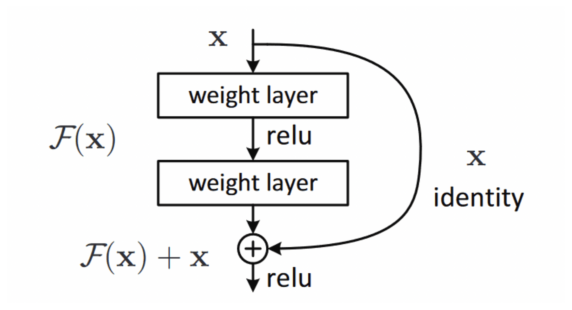

In [107]:
imshow("./imgs/skip_connection.png")

Q7. Что такое transposed convolution и чем она отличается от обычной конволюции

Обычно transposed convolution используется в системах fully conv networks, когда мы сначала кодируем изображение (сжимаем), а потом декодируем его обратно (разжимаем). При сжатии и расжатии часто используют либо pooling + unpooling, либо conv + transposed conv. При этом pooling + unpooling это эквивалентные операции, а conv + transposed conv не совем

Суть такая что в конвалюции есть ядро и то как оно влияет на выход

При деконволюции, когда ядро заходит друг на друга - выходной слой складывается

-------------------------------------------------------------------------------------------------------------------------------------------------------

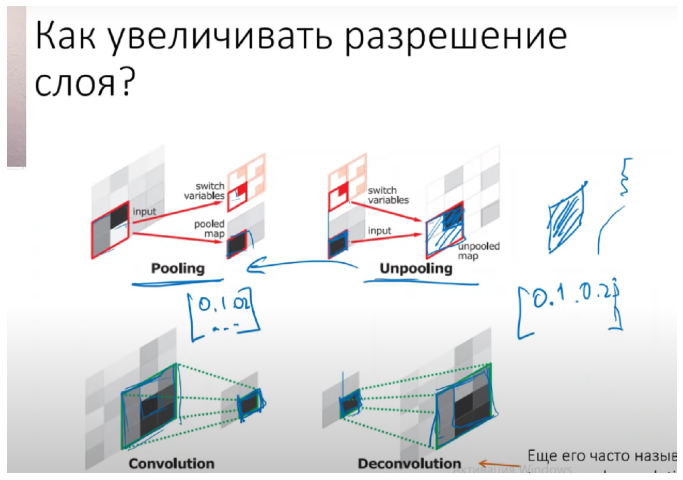

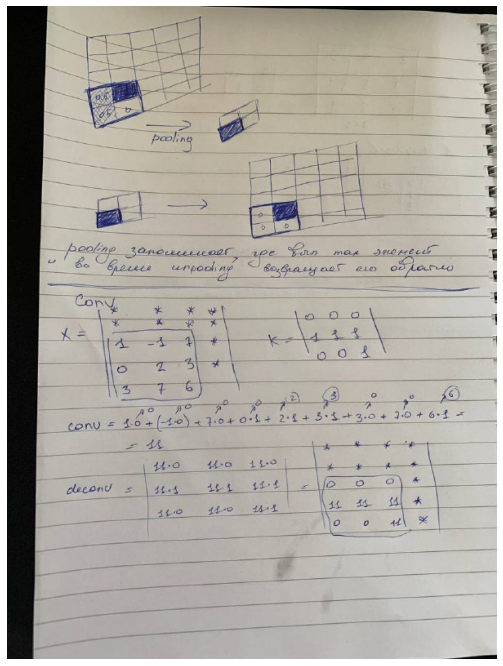

In [129]:
imshow("./imgs/deconv_1.png", (12,12))
imshow("./imgs/deconv_2.jpg", (12,12))

Q8. Feature Pyramid network (FPN)

Проблема: во многих сетях есть проблемы с масштабом, то есть если мы натренируем сеть предсказывать что-то и все данные будут одного масштаба, а потом дадим сетке инпут другого масштаба, то с большой вероятностью качетсво будет сильно ниже

Решение: 
1. Аугментация - конечно помогает, но не всегда 
2. Когда мы декодим изображение, то будем снимать предсказания не только с последнего слоя, а со всех или частично 

-------------------------------------------------------------------------------------------------------------------------------------------------------

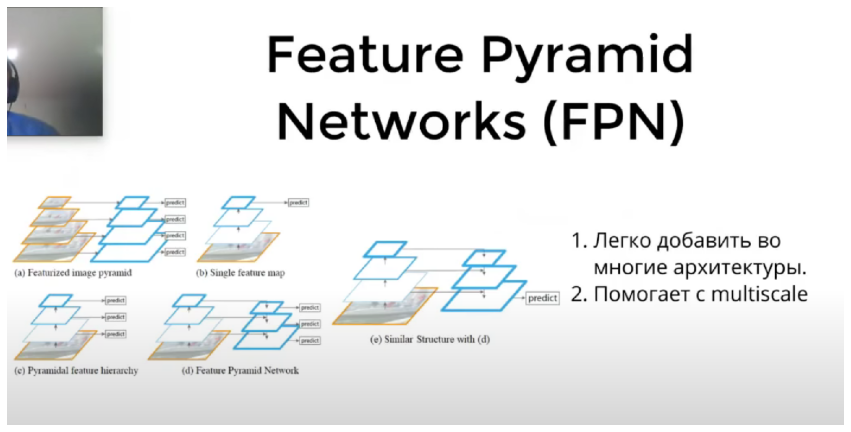

In [133]:
imshow("./imgs/fpn.png", (15,15))

Q9. Виды камер

- Perspective
- Fisheye
- Spherical

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q10. depthwise convolution

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q11. transpose convolution

-------------------------------------------------------------------------------------------------------------------------------------------------------

Q12. separable convolution

-------------------------------------------------------------------------------------------------------------------------------------------------------

## Сегментация

### Метрики

- Intersection over Union (IoU) - это мера, которая определяет, насколько хорошо модель способна разделять объекты на изображении. IoU вычисляется как площадь пересечения между предсказанной маской и истинной маской, деленной на площадь объединения между ними. Идеальное значение IoU равно 1, что означает полное совпадение между предсказанной и истинной масками.

- Pixel Accuracy - это метрика, которая вычисляет процент пикселей, которые были правильно классифицированы моделью. Для задачи сегментации, этот показатель измеряет, насколько хорошо модель определяет каждый пиксель изображения как фон или объект.

- Mean Average Precision (mAP) - это метрика, которая используется для оценки качества алгоритма, когда несколько объектов должны быть обнаружены и правильно классифицированы. mAP вычисляется как среднее значение показателей точности и полноты модели для каждого объекта на изображении.

- F1-мера (F1-Score) - это метрика, которая является гармоническим средним между точностью и полнотой. F1-мера показывает, как хорошо модель находит все объекты, при этом не делая ложных обнаружений.

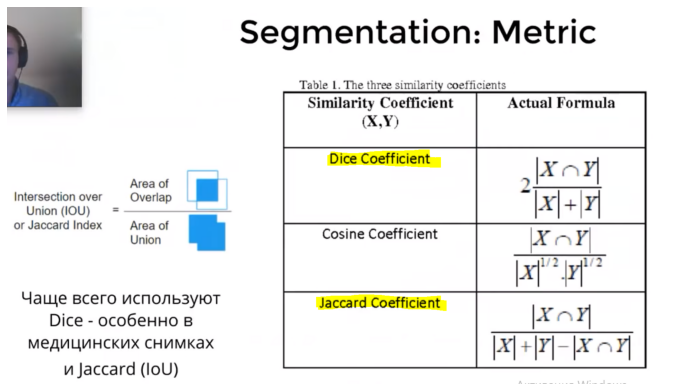

In [135]:
# Основные метрики

imshow("./imgs/Segmentation_metric.png", (12,12))

### Losses

- Binary Cross-Entropy Loss - это функция потерь, которая используется, когда на изображении есть только один объект для сегментации. Для каждого пикселя изображения функция вычисляет вероятность того, что он принадлежит объекту или фону. Затем, с помощью этой вероятности и истинной маски объекта, вычисляется значение функции потерь.

- Categorical Cross-Entropy Loss - это функция потерь, которая используется, когда на изображении может быть несколько объектов для сегментации. В этом случае каждый объект соответствует отдельному классу, и функция вычисляет вероятность принадлежности каждого пикселя каждому из классов.

- Dice Loss - это функция потерь, которая основана на метрике Dice Coefficient. Она измеряет сходство между истинной и предсказанной масками и вычисляет потерю на основе этого сходства.

- Jaccard Loss - это функция потерь, которая основана на метрике Jaccard Index. Она также измеряет сходство между истинной и предсказанной масками, но в отличие от Dice Loss она принимает во внимание площадь пересечения и объединения масок.

- Focal Loss - это функция потерь, которая используется для улучшения качества обучения моделей в условиях несбалансированных данных. Она фокусируется на ошибочных примерах, которые являются трудными для модели, и уменьшает их вклад в общую функцию потерь.

## Детекция

### Метрики

- Precision: Precision is a measure of the fraction of the detected objects that are actually relevant. In object detection, precision can be computed as the ratio of the number of true positive detections to the total number of detections. (FP - те объекты, которые были класса False, а мы задетектили их как Ture)

$P = TP / (TP+FP)$

- Recall: Recall is a measure of the fraction of the relevant objects that are correctly detected. In object detection, recall can be computed as the ratio of the number of true positive detections to the total number of ground truth objects. (FN - те объекты, которые были класса True, а мы задетектили их как Fasle)

$R = TP / (TP+FN)$

- Intersection over Union (IoU): IoU is a measure of the overlap between the predicted bounding box and the ground truth bounding box. It is computed as the ratio of the intersection of the two bounding boxes to their union. A high IoU indicates that the predicted bounding box is close to the ground truth bounding box.

$IoU = Area of Intersection / Area of Union$

- Average Precision (AP): AP is a metric that combines precision and recall across different levels of detection confidence. It is computed by first computing precision-recall curves at different confidence thresholds and then taking the area under the curve (AUC).

- Mean Average Precision (mAP): mAP is a popular metric for evaluating object detection models. It is the mean of the AP values computed for each class in the dataset.

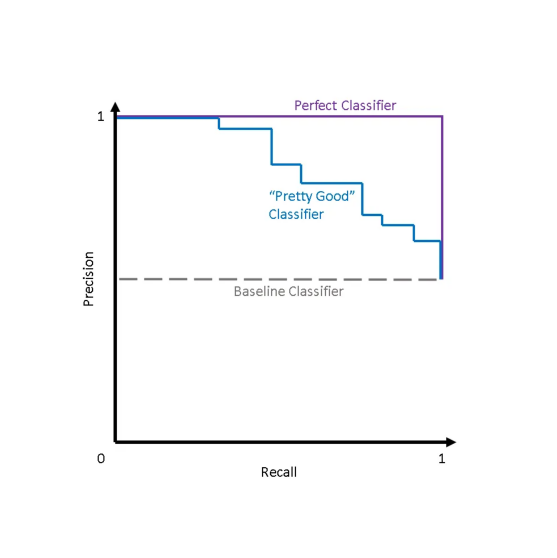

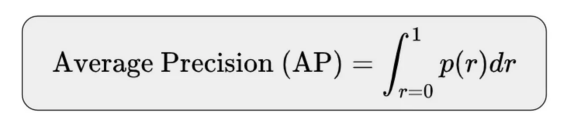

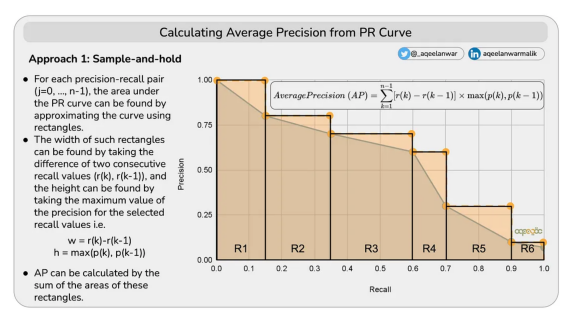

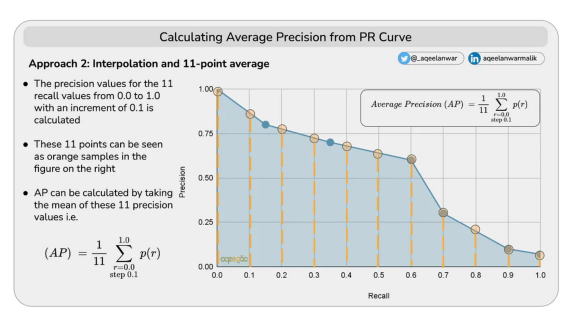

In [142]:
# Как вообще выглядит Presision-Recall Curve
imshow("./imgs/p_r_curve.webp")

# AP - это площадь подкривой Presision-Recall Curve
imshow("./imgs/AP_formula.webp")

# Как все это дело теперь рассчитать. Есть 2 подхода

# Approach 1 — Approximate the PR curve with rectangles
imshow("./imgs/approach_1.webp")

# Approach 2 — Interpolation and 11-point average
imshow("./imgs/approach_2.webp")

### Losses

- Mean Squared Error (MSE): MSE is a popular loss function used in many machine learning tasks, including object detection. It measures the average squared difference between the predicted bounding box and the ground truth bounding box.

    $MSE = 1/n * sum((gt-x)^2)$

- Smooth L1 loss: It is similar to the Mean Squared Error (MSE) loss, but it has some advantages over MSE loss:
    1. Robustness to outliers: Smooth L1 loss is less sensitive to outliers than MSE loss. MSE loss gives a higher weight to large errors, which can be dominated by outliers. Smooth L1 loss reduces the impact of outliers, resulting in a more robust model.
    2. Differentiability: Smooth L1 loss is differentiable everywhere, including at zero, which is not the case for the absolute value loss. This property is useful in gradient-based optimization algorithms, such as stochastic gradient descent, which require a differentiable loss function.
    3. Faster convergence: Smooth L1 loss can lead to faster convergence than MSE loss. The reason is that the gradients of Smooth L1 loss are constant when the absolute error is smaller than a threshold, which leads to more stable gradients and faster convergence.
    4. Improved accuracy: Smooth L1 loss can result in improved accuracy compared to MSE loss. This is because Smooth L1 loss can better handle small errors, which are more common in regression problems.
    
    $L_{\text{Smooth L1}}(x) = \begin{cases}
    0.5x^2 & \text{if } |x| < 1 \\
    |x| - 0.5 & \text{otherwise}
    \end{cases}$ ,

    where x is the difference between the predicted and target values.

- Binary Cross-Entropy Loss: Binary Cross-Entropy Loss is a commonly used loss function for binary classification problems. In object detection, it can be used to predict whether an object is present or not in a given image patch.

    $L_{\text{BCE}}(y, \hat{y}) = - (y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}))$,
    
    where y is the true binary label (either 0 or 1), and y_hat is the predicted probability of the positive class
    
    
- Focal Loss: Focal Loss is a modification of the Cross-Entropy Loss that is designed to address the problem of class imbalance in object detection. It gives more weight to hard examples (i.e., those that are misclassified) and less weight to easy examples (i.e., those that are correctly classified).

    $L_{\text{Focal}}(y, \hat{y}) = - (1 - \hat{y})^{a} y \log(\hat{y}) - \hat{y}^{a} (1 - y) \log(1 - \hat{y})$,
    
    where y is the true binary label (either 0 or 1), and y_hat is the predicted probability of the positive class (i.e., the probability that the label is 1). The parameter **a** controls the degree of modulating the weight assigned to each example.
    
- Intersection over Union (IoU) Loss: IoU Loss is a loss function that directly optimizes the IoU metric. It is used to penalize predictions that have a low IoU with the ground truth bounding box.

    $L_{\text{IoU}}(y, \hat{y}) = 1 - \frac{\sum_{i=1}^n (y_i \cap \hat{y_i})}{\sum_{i=1}^n (y_i \cup \hat{y_i})}$
    
    $L_{\text{IoU}}(y, \hat{y}) = 1 - \frac{\sum_{i=1}^n y_i \hat{y_i}}{\sum_{i=1}^n (y_i + \hat{y_i}) - \sum_{i=1}^n y_i \hat{y_i}}$

The formula can be interpreted as follows: The numerator measures the overlap between the predicted and ground truth masks, and the denominator measures the total area covered by the two masks. The IoU Loss is 1 minus the IoU, which ranges from 0 (no overlap) to 1 (perfect overlap).
    
The IoU Loss is not differentiable everywhere, but it can be approximated by a smooth function such as the Dice Loss, which is also commonly used in object detection and segmentation tasks. Не дифференцируема например, когда маски не пересекаются

$L_{\text{Dice}}(y, \hat{y}) = 1 - \frac{2\sum_{i=1}^n y_i \hat{y_i} + \epsilon}{\sum_{i=1}^n y_i + \sum_{i=1}^n \hat{y_i} + \epsilon}$

where y is the ground truth binary mask, y_hat is the predicted binary mask, and n is the total number of pixels in the mask. The parameter epsilon is a small positive number that is added to the denominator to avoid division by zero.

- GIoU (Generalized Intersection over Union) Loss - это функция потерь, которая используется для задач сегментации объектов на изображениях. Эта функция является улучшенной версией IoU Loss, которая учитывает не только пересечение между предсказанными и эталонными масками, но и их сходство в размере и положении. 

$L_{\text{GIoU}}(y, \hat{y}) = 1 - IoU(y, \hat{y}) + \frac{\text{d}(B, \hat{B})}{\text{d}(B, {B}_{\text{enc}})}$

Здесь $y$ - это эталонная маска объекта, $hat{y}$ - предсказанная маска, $B$ - это ограничивающий прямоугольник для маски $y$, $hat{B}$ - ограничивающий прямоугольник для маски $hat{y}$, а $B_{\text{enc}}$ - это ограничивающий прямоугольник, который содержит оба прямоугольника $B$ и $hat{B}$.

Первое слагаемое в формуле является IoU между эталонной маской y и предсказанной маской $hat{y}$. Второе слагаемое - это расстояние между ограничивающими прямоугольниками B и $hat{B}$, нормализованное на расстояние между $B$ и $B_{\text{enc}}$. Это слагаемое позволяет учесть разницу в размере и положении между масками.

# NLP

## NLP pipline

1. Вход: Набор слов, последовательность символов, аудио, картинка со словами и тд
2. Морфология: разобраться из чего слово состоит (корни. окончания). Проверка текста, поиск по словам
3. Синтаксис: связи слов друг с другом. Проверка текста в контексте: является ли предложение корретным
4. Семантика: понимать смысловую нагрузку. Например: нужно понять позитивный коммантарий или нет
5. Контекст: многих предложений. Чат-боты

Далее необходимо перевести символьное пространство в непрерывное и дифференцируемое
Простой случай: Например у нас есть словарь, где существует огромное множество различных слов. И есть слово "car". Мы преобразуем весь словарь в вектор с нулями, а где в словаре у нас закодировано слово "car", то там присвоим единичку (one-hot-representation)

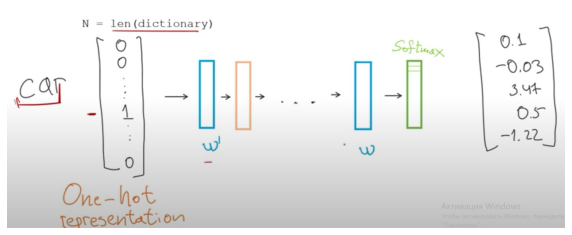

In [3]:
imshow("./imgs/one_hot_rep.PNG")

word2vec
Представление слова в в иде вектора
Идея такая: Для каждого слова мы попытаемся натренировать систему, которая предсказывает какие слова часто встречаются рядом с ним (например в контексте 5 слов). В данном случае датасет - это какой-то набор предложений

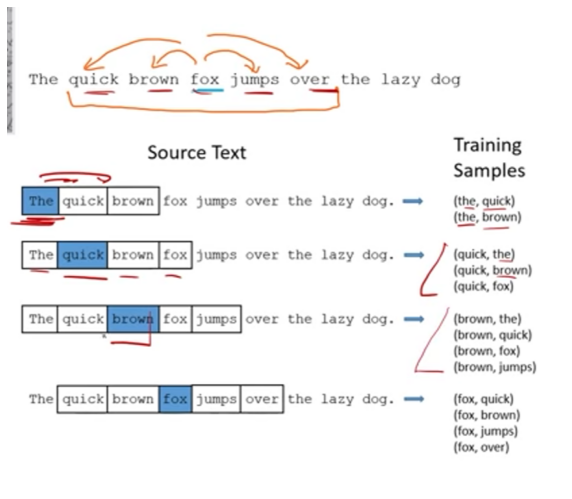

In [5]:
imshow("./imgs/word2wec.PNG")

# Дебаг

https://colab.research.google.com/drive/1o0BGZJBFU1KdUeymMSeAniNZ8WZPb1Yo#scrollTo=g3kEivWOuycj